# Lab 4 - Pitching Aggregation

## Setup

#### `pandas`

In [1]:
import pandas as pd
from dfply import *
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
pitching_raw = pd.read_csv('./data/baseball/core/Pitching.csv') 
pitching = (pitching_raw >>
             mutate(id = pitching_raw.index))
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,id
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,7,NaN,0,146.0,0,42,NaN,NaN,NaN,0
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,7,NaN,0,1291.0,0,292,NaN,NaN,NaN,1
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,2,NaN,0,14.0,0,9,NaN,NaN,NaN,2
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,20,NaN,0,1080.0,1,257,NaN,NaN,NaN,3
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,0,NaN,0,57.0,0,21,NaN,NaN,NaN,4


In [2]:
pitching.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP',
       'id'],
      dtype='object')

#### `sqlalchemy`

In [3]:
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import select as select_sql

pitching_eng = create_engine("sqlite:///databases/baseball_2_5.db") 
Base = automap_base()
Base.prepare(pitching_eng, reflect=True)
Pitching = Base.classes.pitching
Pitching

sqlalchemy.ext.automap.pitching

In [4]:
stmt = select_sql('*').select_from(Pitching).limit(5)
pd.read_sql_query(stmt, con=pitching_eng)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,id
0,bechtge01,1871,1,PH1,None,1,2,3,3,2,...,7,None,0,146.0,0,42,None,None,None,0
1,brainas01,1871,1,WS3,None,12,15,30,30,30,...,7,None,0,1291.0,0,292,None,None,None,1
2,fergubo01,1871,1,NY2,None,0,0,1,0,0,...,2,None,0,14.0,0,9,None,None,None,2
3,fishech01,1871,1,RC1,None,4,16,24,24,22,...,20,None,0,1080.0,1,257,None,None,None,3
4,fleetfr01,1871,1,NY2,None,0,1,1,1,1,...,0,None,0,57.0,0,21,None,None,None,4


#### `pyspark`

In [5]:
from pyspark.sql import SparkSession
from more_pyspark import get_spark_types, to_pandas

spark = SparkSession.builder.appName('Ops').getOrCreate()

schema = get_spark_types(pitching, keys=['id'])

pitching_spark = spark.createDataFrame(pitching, schema=schema)
(pitching_spark.
   take(5)) >> to_pandas

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,id
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,7,NaN,0,146.0,0,42,NaN,NaN,NaN,0
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,7,NaN,0,1291.0,0,292,NaN,NaN,NaN,1
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,2,NaN,0,14.0,0,9,NaN,NaN,NaN,2
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,20,NaN,0,1080.0,1,257,NaN,NaN,NaN,3
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,0,NaN,0,57.0,0,21,NaN,NaN,NaN,4


In [6]:
pitching_spark

DataFrame[playerID: string, yearID: int, stint: int, teamID: string, lgID: string, W: int, L: int, G: int, GS: int, CG: int, SHO: int, SV: int, IPouts: int, H: int, ER: int, HR: int, BB: int, SO: int, BAOpp: float, ERA: float, IBB: float, WP: int, HBP: float, BK: int, BFP: float, GF: int, R: int, SH: float, SF: float, GIDP: float, id: int]

## Task 1

Compute and plot the average home runs per game allowed per year for all years in the pitching table.  To accomplish this task, you should

1. Aggregate total `HR` and `IPouts` for each year.
1. Create a `games_pitched` column, which is computed by dividing total inning pitched outs `IPouts` by 27, the number of outs in a game.
2. Create a `hr_per_game` column by dividing the total `HR` for each year by `games_pitched` for each year.
4. Make line plot of the results. You will need to create a new column `HR_per_game` then perform the group and aggregate. You can use [seaborn's lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to make the graph.

Solve this problem in each framework.

## <font color="red"> Problem 1 </font>

Explain why we might want to total the home runs and outs pitched before dividing.

> *Your thoughts here*
If we do not aggregate we would be doing the division on each row instead of the aggregated year rows.

## <font color="red"> Problem 2 </font>

Complete the above tasks using `pandas` and `dfply`

In [7]:
# Your code here
pitch_change = (pitching >>
                   select(X.yearID, X.HR, X.IPouts) >>
                   group_by(X.yearID) >>
                   summarise(TotalHR = X.HR.sum(),
                             TotalIPouts = X.IPouts.sum()) >>
                   mutate(games_pitched = X.TotalIPouts/27) >>
                   mutate(hr_per_game = X.TotalHR/X.games_pitched) 
                   )
pitch_change.head()

,yearID,TotalHR,TotalIPouts,games_pitched,hr_per_game
0,1871,47,6750,250.000000,0.188000
1,1872,37,9858,365.111111,0.101339
2,1873,47,10754,398.296296,0.118003
3,1874,40,12509,463.296296,0.086338
4,1875,40,18571,687.814815,0.058155


## <font color="red"> Problem 3 </font>

Complete the above tasks using `sqlalchemy`

In [8]:
# Your code here
from sqlalchemy.sql import select as select_sql
from sqlalchemy import func
from more_sqlalchemy import pprint
pitch_sql = (select_sql([Pitching.yearID,
                         func.sum(Pitching.HR).label('total_HR'),
                         func.sum(Pitching.IPouts).label('total_ipouts')])
             .group_by(Pitching.yearID)
             .alias('pitch_sql')
            )
pprint(pitch_sql)

SELECT pitching."yearID",
       sum(pitching."HR") AS "total_HR",
       sum(pitching."IPouts") AS total_ipouts
FROM pitching
GROUP BY pitching."yearID"


In [9]:
pd.read_sql_query(pitch_sql, con=pitching_eng).head()

,yearID,total_HR,total_ipouts
0,1871,47,6750
1,1872,37,9858
2,1873,47,10754
3,1874,40,12509
4,1875,40,18571


In [10]:
from sqlalchemy import text
games_pitched = (select_sql([pitch_sql.c.yearID,
                             pitch_sql.c.total_ipouts,
                             pitch_sql.c.total_HR,
                             (pitch_sql.c.total_ipouts/27).label('games_pitched')])
                 .select_from(pitch_sql)
                 .alias('games_pitched')
                )
pprint(games_pitched)

SELECT pitch_sql."yearID",
       pitch_sql.total_ipouts,
       pitch_sql."total_HR",
       pitch_sql.total_ipouts / :total_ipouts_1 AS games_pitched
FROM
  (SELECT pitching."yearID" AS "yearID",
          sum(pitching."HR") AS "total_HR",
          sum(pitching."IPouts") AS total_ipouts
   FROM pitching
   GROUP BY pitching."yearID") AS pitch_sql


In [11]:
pd.read_sql_query(games_pitched, con=pitching_eng).head()

,yearID,total_ipouts,total_HR,games_pitched
0,1871,6750,47,250
1,1872,9858,37,365
2,1873,10754,47,398
3,1874,12509,40,463
4,1875,18571,40,687


In [12]:
from sqlalchemy import cast, Float
ratios = (select_sql([games_pitched.c.yearID,
                      (cast(games_pitched.c.total_HR, Float)/games_pitched.c.games_pitched).label('hr_per_game')
                     ])
         .select_from(games_pitched)
         )
pprint(ratios)

SELECT games_pitched."yearID",
       CAST(games_pitched."total_HR" AS FLOAT) / games_pitched.games_pitched AS hr_per_game
FROM
  (SELECT pitch_sql."yearID" AS "yearID",
          pitch_sql.total_ipouts AS total_ipouts,
          pitch_sql."total_HR" AS "total_HR",
          pitch_sql.total_ipouts / :total_ipouts_1 AS games_pitched
   FROM
     (SELECT pitching."yearID" AS "yearID",
             sum(pitching."HR") AS "total_HR",
             sum(pitching."IPouts") AS total_ipouts
      FROM pitching
      GROUP BY pitching."yearID") AS pitch_sql) AS games_pitched


In [13]:
hr_per_game_sql = pd.read_sql_query(ratios, con=pitching_eng)

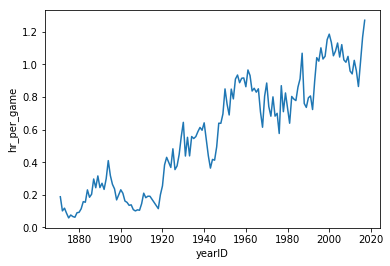

In [14]:
sns.lineplot(x='yearID', y='hr_per_game', data=hr_per_game_sql)

## <font color="red"> Problem 4 </font>

Complete the above tasks using `pyspark`

In [15]:
# Your code here
import pyspark.sql.functions as fn
(pitching_spark
.select([pitching_spark.yearID,
        pitching_spark.HR,
        pitching_spark.IPouts])
.groupby(pitching_spark.yearID)
.agg(fn.sum(pitching_spark.HR).alias('total_HR'),
    fn.sum(pitching_spark.IPouts).alias('total_ipouts'))
.withColumn('games_pitched', (fn.col("total_ipouts")/27))
.withColumn('hr_per_game', (fn.col('total_HR')/fn.col('games_pitched')))
.orderBy(pitching_spark.yearID, ascending=True)
.collect()
) >> to_pandas >> head


,yearID,total_HR,total_ipouts,games_pitched,hr_per_game
0,1871,47,6750,250.000000,0.188000
1,1872,37,9858,365.111111,0.101339
2,1873,47,10754,398.296296,0.118003
3,1874,40,12509,463.296296,0.086338
4,1875,40,18571,687.814815,0.058155


## <font color="blue"> Key for Problem 4</font>

## Task 2

For each year, determine the team that had the most home runs (using the `Pitching.csv` file).

## <font color="red"> Problem 5 </font>

Solve **Task 2** with the framework of your choice.

In [102]:
# Your code here
most_HR = (pitching 
>> select(X.yearID,X.teamID,X.HR)
>> group_by(X.yearID, X.teamID)
>> summarise(Total_HR = X.HR.sum())
>> ungroup
>> group_by(X.yearID)
>> filter_by(X.Total_HR == X.Total_HR.max()))
most_HR.head()

,teamID,yearID,Total_HR
2,CL1,1871,13
10,BR1,1872,7
28,WS5,1873,11
30,BR2,1874,15
37,BR2,1875,6


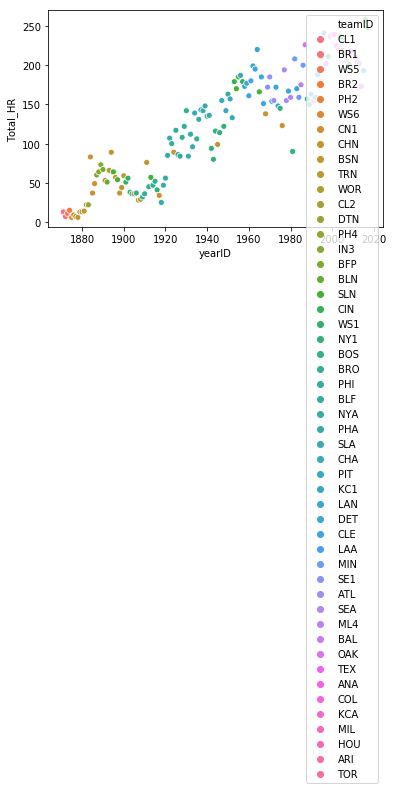

In [112]:
sns.scatterplot(x='yearID', y='Total_HR', y_jitter=True, hue="teamID",data=most_HR)